In [159]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Preparing The Data

## Google Data

In [155]:
#Import the data
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + 'World firearms murders and ownership - Sheet 1.csv')

#Tidy it up
df1.drop(['ISO code', 'Source', 'Rank by rate of ownership', '% of homicides by firearm', 
         'Homicide by firearm rate per 100,000 pop', 'Average firearms per 100 people'], axis=1, inplace=True)
df1 = df1.rename(columns={'Country/Territory': 'Country', 'Number of homicides by firearm': 'Gun Homicides',
                         'Average total all civilian firearms': 'Average Total Civilian Firearms'
                         })

#Show the head
df1.head()

,Country,Gun Homicides,Average Total Civilian Firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


## World Population Data, 2012

In [103]:
#Import the data
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + 'API_SP.POP.TOTL_DS2_en_csv_v2.csv', skiprows=[0,1,2,3], header=None)

#Tidy it up
new_header = df2.iloc[0]
df2 = df2[1:] 
df2.columns = new_header
df2.drop(['Country Code', 'Indicator Name', 'Indicator Code', 
          1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0,
          1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0,
          1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0,
          1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0,
          2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0,
          2010.0, 2011.0, 2013.0, 2014.0, 2015.0, 2016.0, nan], axis=1, inplace = True)
df2 = df2.rename(columns={2012.0: 'Population', 'Country Name': 'Country'})

#Show the head
df2.head()

,Country,Population
1,Aruba,102577.0
2,Afghanistan,30696958.0
3,Angola,25096150.0
4,Albania,2900401.0
5,Andorra,82431.0


## World GDP Data, 2012

In [104]:
#Import the data
df3 = pd.read_csv(os.getenv("PUIDATA") + "/" + 'API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv', skiprows=[0,1,2,3], header=None)

#Tidy it up
new_header = df3.iloc[0]
df3 = df3[1:] 
df3.columns = new_header
df3.drop(['Country Code', 'Indicator Name', 'Indicator Code', 
          1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0,
          1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0,
          1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0,
          1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0,
          2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0,
          2010.0, 2011.0, 2013.0, 2014.0, 2015.0, 2016.0, nan], axis=1, inplace = True)
df3 = df3.rename(columns={2012.0: 'GDP', 'Country Name': 'Country'})

#Show the head
df3.head()

,Country,GDP
1,Aruba,NaN
2,Afghanistan,2.053654e+10
3,Angola,1.153984e+11
4,Albania,1.231978e+10
5,Andorra,3.146152e+09


## Shooting Data, 2012

In [105]:
#Import the data
df4 = pd.read_csv(os.getenv('PUIDATA') + '/' + 'data-pvLFI.csv')

#Show the head
df4.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Beligium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


## Merging Them Together

In [106]:
merge1 = pd.merge(df1, df4, on='Country')
merge2 = pd.merge(merge1, df2, on='Country')
df = pd.merge(merge2, df3, on='Country')
df.head(30)

,Country,Gun Homicides,Average Total Civilian Firearms,Guns/100 inhabitants,Number of mass shootings,Population,GDP
0,Australia,30.0,3050000.0,15.0,4,22728254.0,1.538194e+12
1,Austria,18.0,2500000.0,30.4,1,8429991.0,4.074516e+11
2,Canada,173.0,9950000.0,30.8,4,34750545.0,1.824289e+12
3,Denmark,15.0,650000.0,12.0,0,5591572.0,3.271489e+11
4,Finland,24.0,2400000.0,45.3,2,5413971.0,2.567065e+11
5,France,35.0,19000000.0,31.2,6,65659790.0,2.681416e+12
6,Germany,158.0,25000000.0,30.3,7,80425823.0,3.543984e+12
7,Greece,29.0,2500000.0,22.5,0,11045011.0,2.456707e+11
8,Hungary,7.0,560000.0,5.5,0,9920362.0,1.273211e+11
9,Iceland,0.0,90000.0,30.3,0,320716.0,1.421858e+10


-----

# Exploring The Data

## 1 - Mass Shooting vs. GDP

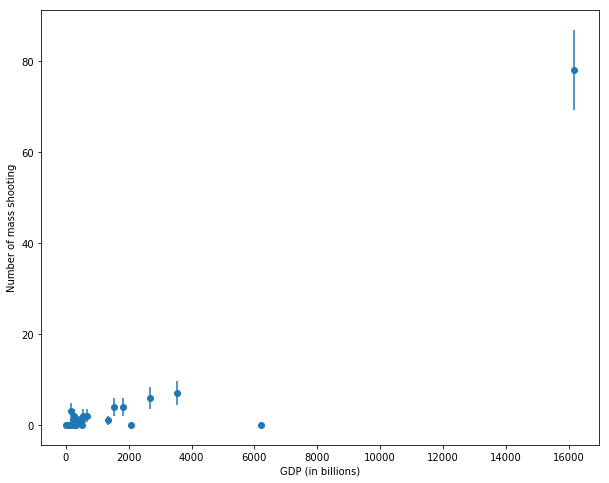

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [156]:
fig = pl.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)

scatter = ax.scatter((df['GDP'] / 1e9), df['Number of mass shootings'])
ax.errorbar((df['GDP'] / 1e9), df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), 
            fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

## 2 - Mass Shooting vs. Population

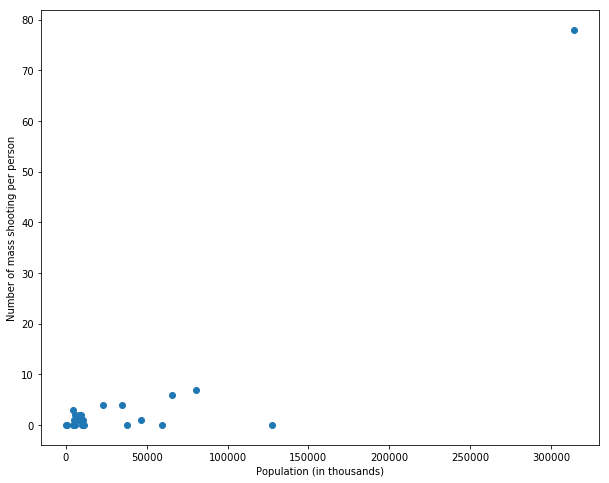

Number of mass shooting vs population, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest population and the highest number of mass shootings


In [122]:
fig = pl.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)

scatter = ax.scatter((df['Population'] / 1000), df['Number of mass shootings'])
ax.set_xlabel("Population (in thousands)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs population, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest population and the highest number of mass shootings")

## 3 - Average Number of Civilian Firearms per Person

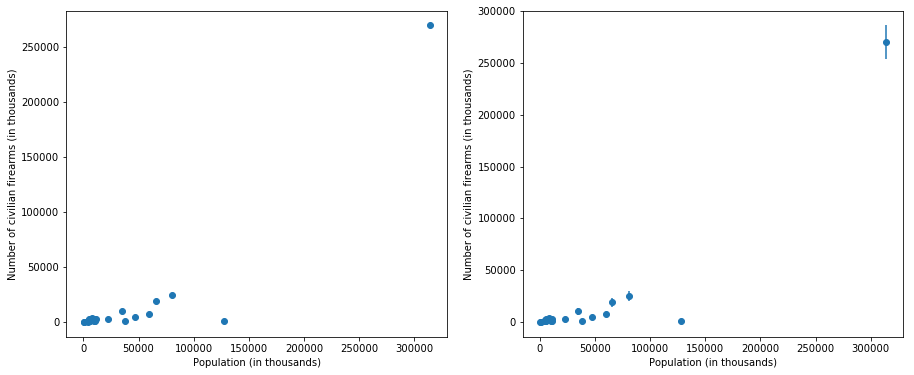

Number of civilian firearms vs population, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest population and the highest number of civilian firearms


In [177]:
fig = pl.figure(figsize=(15,6)) 

#Without Errors
ax1 = fig.add_subplot(121)
scatter = ax1.scatter((df['Population'] / 1000), (df['Average Total Civilian Firearms'] / 1000))
ax1.set_xlabel("Population (in thousands)")
ax1.set_ylabel("Number of civilian firearms (in thousands)")
ax1.set_ylim()


#With Errors
ax2 = fig.add_subplot(122)
scatter = ax2.scatter((df['Population'] / 1000), (df['Average Total Civilian Firearms'] / 1000))
ax2.errorbar((df['Population'] / 1000), (df['Average Total Civilian Firearms'] / 1000),
            yerr = np.sqrt(df['Average Total Civilian Firearms'] * 1.0), fmt = '.')
ax2.set_xlabel("Population (in thousands)")
ax2.set_ylabel("Number of civilian firearms (in thousands)")
ax2.set_ylim()

pl.show()
print ("Number of civilian firearms vs population, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest population and the highest number of civilian firearms")

## 4 - Average Number of Homicides by Firearm per Person

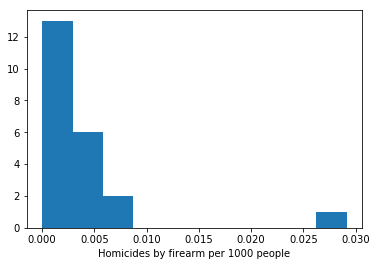

In [189]:
fig, ax = plt.subplots()
ax.hist(df['Gun Homicides'] / df['Population'] * 1000)
ax.set_xlabel('Homicides by firearm per 1000 people');

## 5 - Average Number of Homicides by Firearm vs. GDP

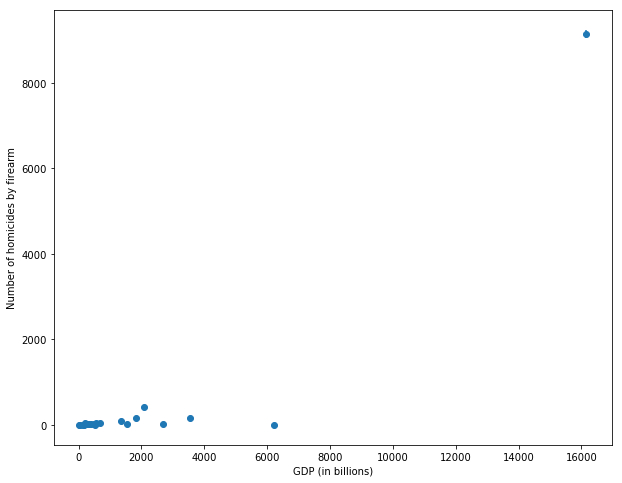

Number of homicides by firearm vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of homicides by firearm


In [184]:
fig = pl.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)

scatter = ax.scatter((df['GDP'] / 1e9), df['Gun Homicides']) 
ax.errorbar((df['GDP'] / 1e9), df['Gun Homicides'], 
            yerr = np.sqrt(df['Gun Homicides'] * 1.0),
            fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of homicides by firearm")

## 6 - Number of Homicides by Firearm vs. Number of Civilian Firearms

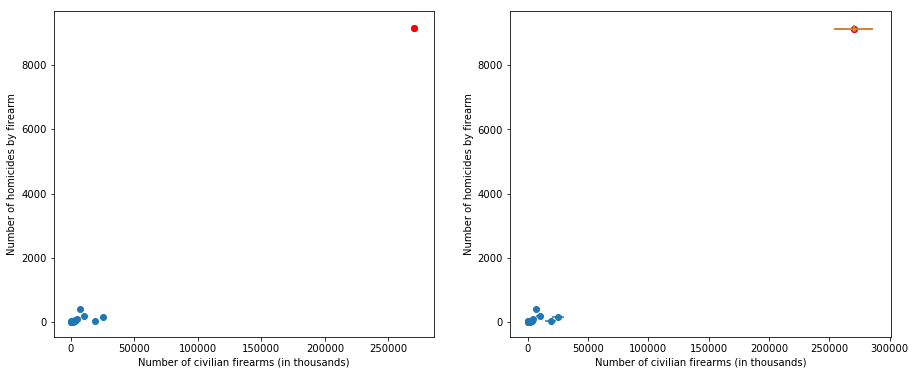

Number of homicides by firearm vs number of civilian firearms, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest number of homicides by firearm and the highest number of civilian firearms


In [154]:
fig = pl.figure(figsize=(15,6)) 

#Without Errors
ax1 = fig.add_subplot(121)
scatter = ax1.scatter((df['Average Total Civilian Firearms'] / 1000), df['Gun Homicides'])
scatterUSA = ax1.scatter((df['Average Total Civilian Firearms'][21]) / 1000, df['Gun Homicides'][21], c='r')
ax1.set_xlabel("Number of civilian firearms (in thousands)")
ax1.set_ylabel("Number of homicides by firearm")
ax1.set_ylim()


#With Errors
ax2 = fig.add_subplot(122)
scatter = ax2.scatter((df['Average Total Civilian Firearms'] / 1000), df['Gun Homicides'])
scatterUSA = ax2.scatter((df['Average Total Civilian Firearms'][21]) / 1000, df['Gun Homicides'][21], c='r')
ax2.errorbar((df['Average Total Civilian Firearms'] / 1000), df['Gun Homicides'],
                yerr = np.sqrt(df['Gun Homicides'] * 1.0),
                xerr = np.sqrt(df['Average Total Civilian Firearms'] * 1.0), fmt = '.')
ax2.errorbar((df['Average Total Civilian Firearms'][21] / 1000), df['Gun Homicides'][21],
                yerr = np.sqrt(df['Gun Homicides'][21] * 1.0),
                xerr = np.sqrt(df['Average Total Civilian Firearms'][21] * 1.0), fmt = '.')
ax2.set_xlabel("Number of civilian firearms (in thousands)")
ax2.set_ylabel("Number of homicides by firearm")
ax2.set_ylim()

pl.show()
print ("Number of homicides by firearm vs number of civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest number of homicides by firearm and the highest number of civilian firearms")

## 7 - Number of Mass Shootings vs. Number of Civilian Firearms

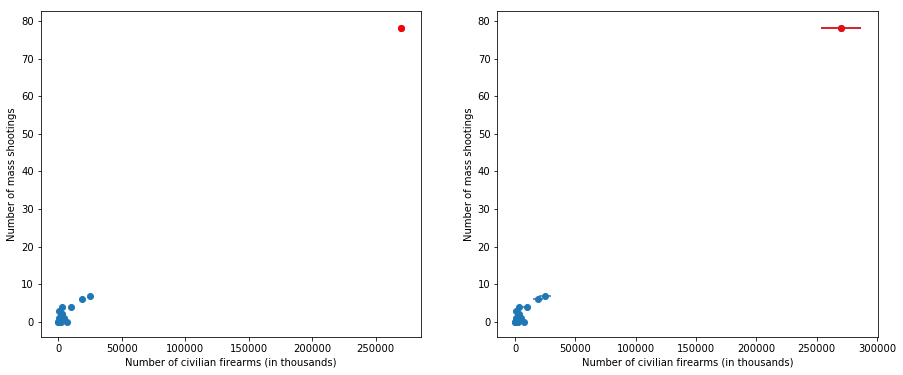

Number of mass shootings vs number of civilian firearms, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest number of mass shootings and the highest number of civilian fire arms


In [153]:
fig = pl.figure(figsize=(15,6)) 

#Without Errors
ax1 = fig.add_subplot(121)
scatter = ax1.scatter((df['Average Total Civilian Firearms'] / 1000), df['Number of mass shootings'])
scatterUSA = ax1.scatter((df['Average Total Civilian Firearms'][21]) / 1000, df['Number of mass shootings'][21], c='r')
ax1.set_xlabel("Number of civilian firearms (in thousands)")
ax1.set_ylabel("Number of mass shootings")
ax1.set_ylim()


#With Errors
ax2 = fig.add_subplot(122)
scatter = ax2.scatter((df['Average Total Civilian Firearms'] / 1000), df['Number of mass shootings'])
scatterUSA = ax2.scatter((df['Average Total Civilian Firearms'][21]) / 1000, df['Number of mass shootings'][21], c='r')
ax2.errorbar((df['Average Total Civilian Firearms'] / 1000), df['Number of mass shootings'], 
                     xerr = np.sqrt(df['Average Total Civilian Firearms'] * 1.0), fmt = '.')
ax2.errorbar((df['Average Total Civilian Firearms'][21] / 1000), df['Number of mass shootings'][21], 
                     xerr = np.sqrt(df['Average Total Civilian Firearms'][21] * 1.0), fmt = '.', c='r')
ax2.set_xlabel("Number of civilian firearms (in thousands)")
ax2.set_ylabel("Number of mass shootings")
ax2.set_ylim()

pl.show()
print ("Number of mass shootings vs number of civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest number of mass shootings and the highest number of civilian fire arms");

---

# Modeling The Data

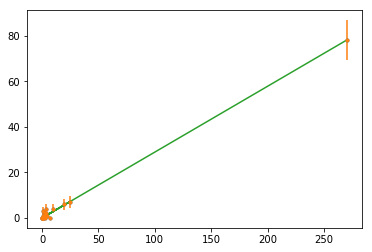

In [208]:
y = df['Number of mass shootings'] 
x = df['Average Total Civilian Firearms'] / 1000000
#x is in millions

rmO = sm.OLS(endog = y, exog = x).fit()
rmW = sm.WLS(endog = y, exog = x).fit()

pl.plot(x,y,'.')
yerr=np.abs(y)**0.5
pl.errorbar(x,y,yerr=np.abs(y)**0.5, fmt='.')
pl.plot(x,rmW.fittedvalues,'-');